In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.preprocessing import StandardScaler
import seaborn as sns
plt.style.use('default')

In [2]:
df = pd.read_excel("dairy_nutrition_7.xlsx")
df.head()

,Type,Description,Protein_g,Fat_g,Carb_g,Sugar_g,VitA_mcg,VitB6_mg,VitB12_mcg,Calcium_mg
0,Cheese,"Cheese food, cold pack, American",19.66,24.46,8.32,0.00,0,0.141,1.28,497
1,Cream,"Cream, whipped, cream topping, pressurized",3.20,22.22,12.49,8.00,188,0.041,0.29,101
2,Ice cream,"Fat free ice cream, no sugar added, flavors ot...",4.41,0.00,27.94,8.82,133,0.029,0.52,147
3,Milk,"Milk, whole, 3.25% milkfat, with added vitamin D",3.15,3.25,4.80,5.05,46,0.036,0.45,113
4,Milk,"Milk, whole, 3.25% milkfat, without added vita...",3.15,3.27,4.78,5.05,46,0.036,0.45,113


In [3]:
df_reduced, df_label = df.drop(['Type', 'Description'], axis=1), df["Type"]

In [4]:
scale = StandardScaler()
df_scale = pd.DataFrame(scale.fit_transform(df_reduced),
                        columns=df_reduced.columns)

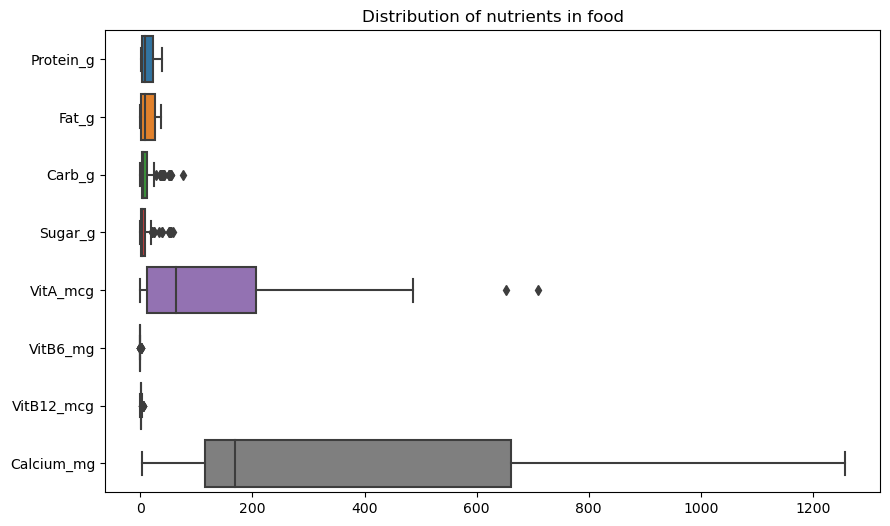

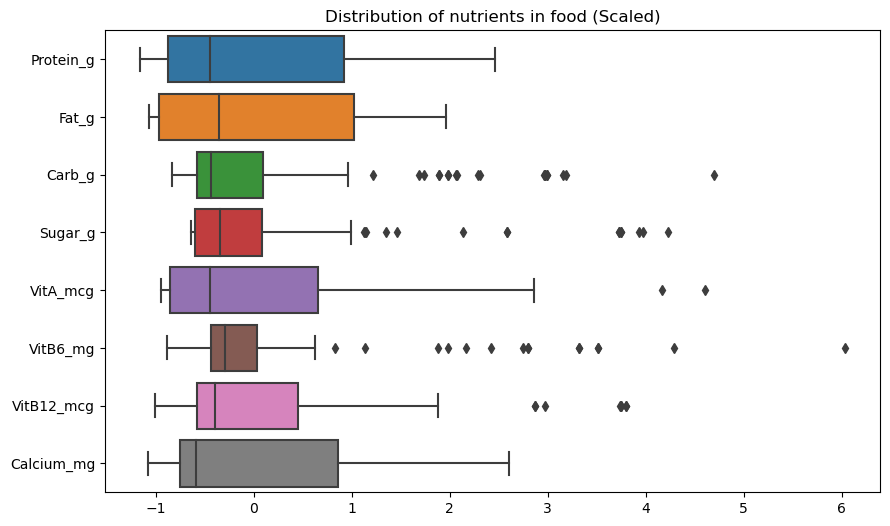

In [5]:
plt.subplots(figsize=(10, 6))
sns.boxplot(data=df_reduced, orient="h")
plt.title("Distribution of nutrients in food")
plt.show()

plt.subplots(figsize=(10, 6))
sns.boxplot(data=df_scale, orient="h")
plt.title("Distribution of nutrients in food (Scaled)")
plt.show()

In [6]:
def pca_results(data, pca):

    # Dimension indexing
    dimensions = ['PC {}'.format(i) for i in range(1, len(pca.components_)+1)]

    # PCA components
    components = pd.DataFrame(
        np.round(pca.components_, 4), columns=data.keys())
    components.index = dimensions

    # PCA eigenvalues
    ev = pca.explained_variance_.reshape(len(pca.components_), 1)
    eigenvalues = pd.DataFrame(np.round(ev, 4), columns=['Eigenvalue'])
    eigenvalues.index = dimensions

    # PCA explained variance
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
    variance_ratios = pd.DataFrame(
        np.round(ratios, 4), columns=['Explained Variance'])
    variance_ratios.index = dimensions

    # PCA cumulative variance explained
    cum_ratios = pca.explained_variance_ratio_.cumsum().reshape(len(pca.components_), 1)
    cum_variance_ratios = pd.DataFrame(np.round(cum_ratios, 4), columns=[
                                       'Cumulative Explained Variance'])
    cum_variance_ratios.index = dimensions
    # Return a concatenated DataFrame
    return pd.concat([eigenvalues, variance_ratios, cum_variance_ratios, components], axis=1)

In [7]:
pca = PCA(n_components=len(df_scale.columns)).fit(df_scale)

pca_sampled = pca.transform(df_scale)

In [8]:
pca_results(df_scale, pca)

,Eigenvalue,Explained Variance,Cumulative Explained Variance,Protein_g,Fat_g,Carb_g,Sugar_g,VitA_mcg,VitB6_mg,VitB12_mcg,Calcium_mg
PC 1,3.7798,0.4697,0.4697,0.4730,0.3032,0.0438,0.0680,0.3742,0.3544,0.4368,0.4705
PC 2,2.1723,0.2699,0.7396,-0.1048,-0.3131,0.6242,0.6084,-0.1590,0.2592,0.1816,-0.0764
PC 3,0.8875,0.1103,0.8499,0.1344,-0.5737,-0.2901,-0.3372,-0.4501,0.3827,0.3128,0.0896
PC 4,0.4623,0.0575,0.9074,-0.3493,-0.0204,-0.0765,-0.1651,0.5057,0.6348,-0.0633,-0.4264
PC 5,0.3313,0.0412,0.9485,0.0003,-0.6666,-0.0629,0.0463,0.6095,-0.3799,0.0609,0.1733
PC 6,0.1922,0.0239,0.9724,-0.2075,0.1441,0.2421,-0.3289,0.0218,-0.3263,0.7467,-0.3239
PC 7,0.1435,0.0178,0.9903,0.3909,-0.1145,0.6391,-0.5552,0.0519,0.0323,-0.3325,-0.0555
PC 8,0.0783,0.0097,1.0000,-0.6553,0.0479,0.2177,-0.2564,-0.0420,0.0770,-0.0506,0.6670


<Figure size 640x480 with 0 Axes>

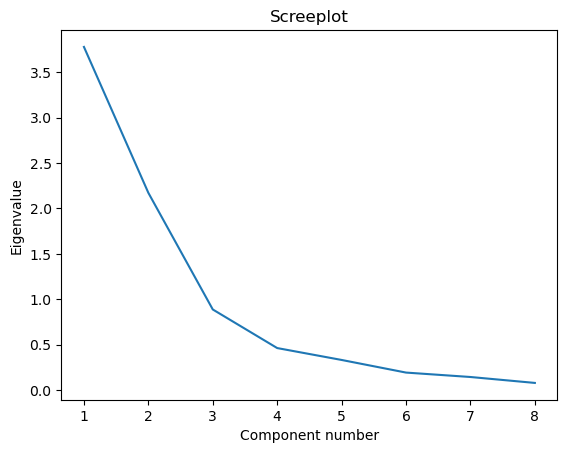

In [9]:
# Scree plot
import matplotlib.ticker as ticker
plt.clf()
fig1, ax1 = plt.subplots()
ax1.plot(np.arange(1, len(pca.explained_variance_)+1), pca.explained_variance_)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax1.set(xlabel='Component number', ylabel='Eigenvalue', title='Screeplot')
plt.show()

In [10]:
def get_cmap(n, name='hsv'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)

In [11]:
def plot_loading_plot(data, pca, width=5, height=5, margin=0.25, ax=None):
    # Set limits for figure
    x_min = min(pca.components_[0, :].min(), 0)-margin
    x_max = max(pca.components_[0, :].max(), 0)+margin
    y_min = min(pca.components_[1, :].min(), 0)-margin
    y_max = max(pca.components_[1, :].max(), 0)+margin
    if ax is None:
        fig, ax = plt.subplots(figsize=(width, height))
        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
    # Give each component own color for legend
    cmap = get_cmap(len(pca.components_.T) + 1)
    for i, v in enumerate(pca.components_.T):
        ax.arrow(0, 0, v[0], v[1], head_width=0.1,
                 head_length=0.1, linewidth=2, color=cmap(i), label=data.columns[i])
   
    plt.plot([x_min, x_max], [0, 0], color='k', linestyle='--', linewidth=1)
    plt.plot([0, 0], [y_min, y_max], color='k', linestyle='--', linewidth=1)
    ax.set_xlabel("PC1")
    ax.set_ylabel("PC2")
    ax.set_title("Loading plot")
    plt.legend(
        loc='upper center',
        bbox_to_anchor=(0.5, -0.15),
        fancybox=True,
        shadow=True,
        ncol=2)
    return ax

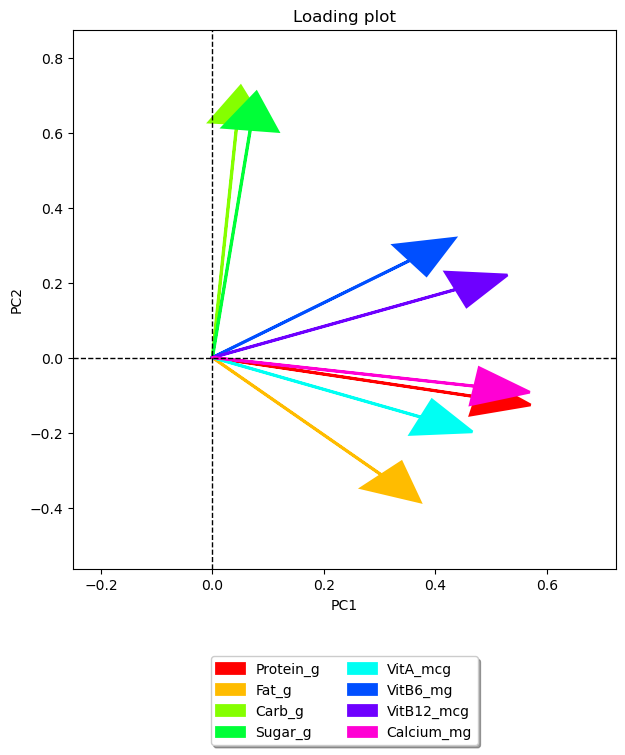

In [12]:
plt.clf
plot_loading_plot(df_reduced, pca, width=7, height=7)
plt.show()

In [13]:
def pca_extractor(data, pca, n_components):
    return pd.DataFrame(pca.transform(data)).iloc[:, :n_components]


def plot_score_plot(data=None, pca=None, n_components=None, categorise=None, ax=None, width=5, height=5, margin=0.5):
    if ax is None:
        fig, ax = plt.subplots(figsize=(width, height))
    score = pca_extractor(data, pca, n_components)
    x_min = min(score[0].min(), 0)-margin
    x_max = max(score[0].max(), 0)+margin
    y_min = min(score[1].min(), 0)-margin
    y_max = max(score[1].max(), 0)+margin
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    plt.plot([x_min, x_max], [0, 0], color='k', linestyle='--', linewidth=1)
    plt.plot([0, 0], [y_min, y_max], color='k', linestyle='--', linewidth=1)
    ax.set_xlabel("PC1")
    ax.set_ylabel("PC2")
    ax.set_title("Score plot")
    if categorise is not None and isinstance(categorise, pd.Series):
        df = pd.concat([score, categorise], axis=1)
        sns.scatterplot(data=df, x=0, y=1, hue=categorise.name)
        plt.legend(
            loc='upper center',
            bbox_to_anchor=(0.5, -0.15),
            fancybox=True,
            shadow=True,
            ncol=2)
    else:
        sns.scatterplot(data=score, x=0, y=1)

    return ax

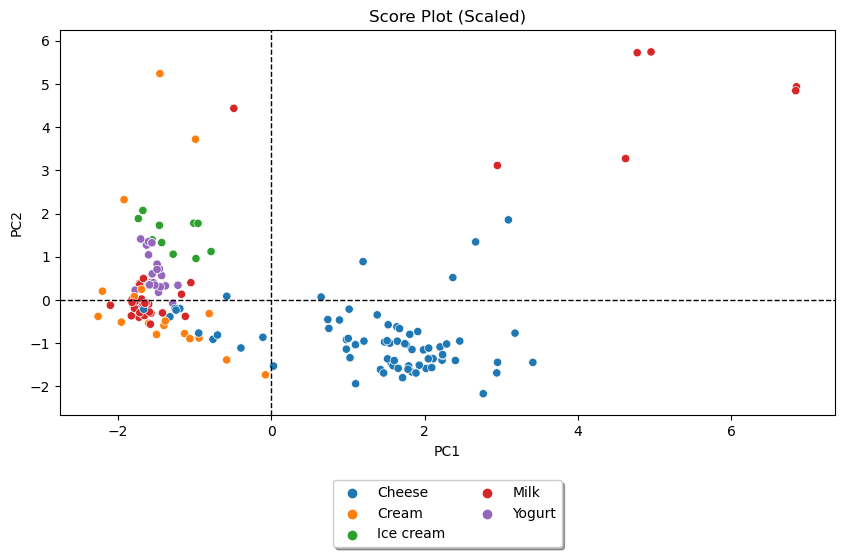

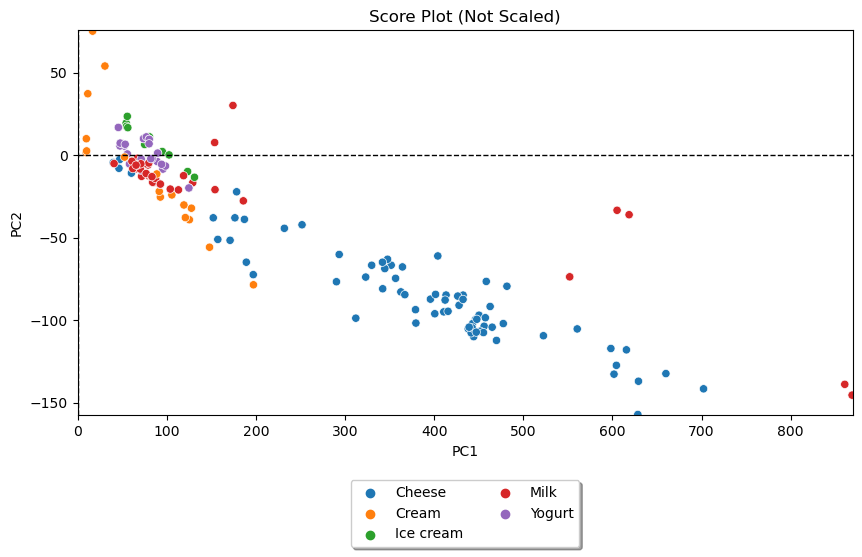

In [14]:
scaled = plot_score_plot(df_scale, pca, 2, categorise=df_label, width=10)
unscaled = plot_score_plot(df_reduced, pca, 2, categorise=df_label, width=10)
scaled.set_title("Score Plot (Scaled)")
unscaled.set_title("Score Plot (Not Scaled)")
plt.show()

In [15]:
df_reduced.describe()

,Protein_g,Fat_g,Carb_g,Sugar_g,VitA_mcg,VitB6_mg,VitB12_mcg,Calcium_mg
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000
mean,12.599529,13.065000,11.405353,7.628176,121.711765,0.073082,0.850176,371.235294
std,10.303203,12.276405,13.684370,11.943896,127.921779,0.082125,0.840021,340.763436
min,0.680000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
25%,3.537500,1.235000,3.402500,0.502500,12.500000,0.037250,0.360000,114.500000
50%,8.030000,8.635000,5.370000,3.450000,64.500000,0.049000,0.515000,169.000000
75%,22.077500,25.537500,12.637500,8.620000,205.500000,0.075750,1.227500,661.750000
max,37.860000,37.000000,75.420000,58.010000,709.000000,0.567000,4.030000,1257.000000


In [16]:
def calc_line(Protein_g, Fat_g, Carb_g, Sugar_g, VitA_mcg, VitB6_mg, VitB12_mcg, Calcium_mg):
    variables = pd.DataFrame([[Protein_g, Fat_g, Carb_g, Sugar_g, VitA_mcg, VitB6_mg, VitB12_mcg, Calcium_mg]],
                             columns=df_reduced.columns)  # put into dataframe
    # scale the variables and make into 1d array
    variables_scaled = scale.transform(variables)[0]
    calc_pc1 = np.dot(np.array(pca.components_)[0], variables_scaled)
    calc_pc2 = np.dot(np.array(pca.components_)[1], variables_scaled)

    return calc_pc1, calc_pc2

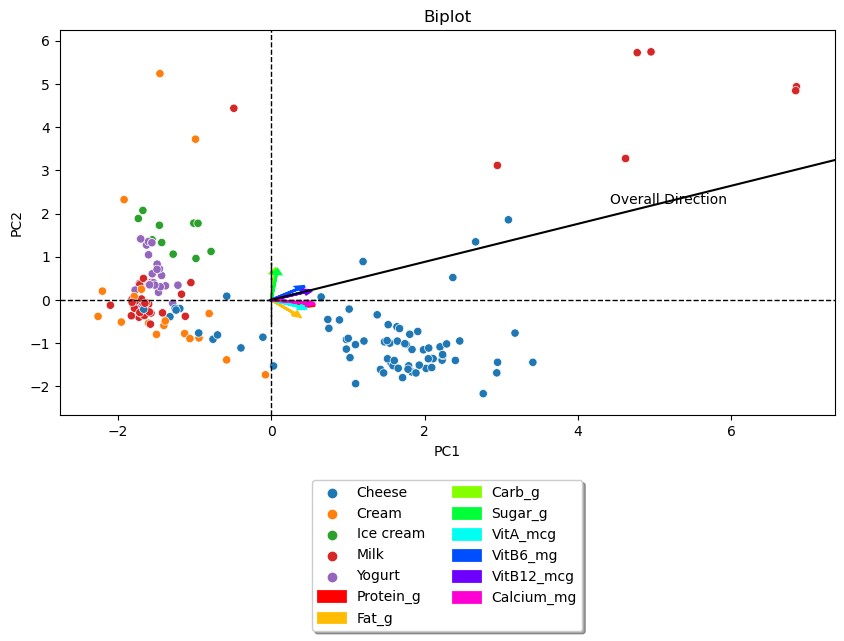

In [17]:
scaled = plot_score_plot(df_scale, pca, 2, categorise=df_label, width=10)
plot_loading_plot(df_scale, pca, ax=scaled)
minMaxDF = pd.concat([df_reduced.min(),df_reduced.max()],axis=1).rename(columns={0:"Min",1:"Max"})
x, y = calc_line(minMaxDF["Max"][0], minMaxDF["Min"][1], minMaxDF["Min"][2],
                 minMaxDF["Max"][3],minMaxDF["Max"][4],minMaxDF["Max"][5],minMaxDF["Max"][6],minMaxDF["Max"][7])
plt.plot([0, x], [0, y],color="black")
plt.annotate("Overall Direction",xy=(x/2+0.5,y/2+0.5))
scaled.set_title("Biplot")
plt.show()

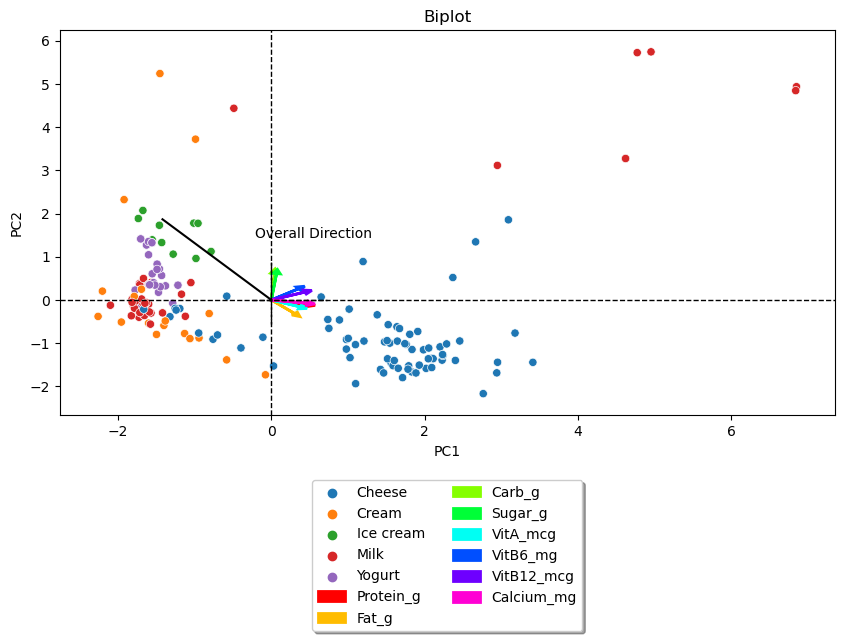

In [18]:
scaled = plot_score_plot(df_scale, pca, 2, categorise=df_label, width=10)
plot_loading_plot(df_scale, pca, ax=scaled)
minMaxDF = pd.concat([df_reduced.min(),df_reduced.max()],axis=1).rename(columns={0:"Min",1:"Max"})
x, y = calc_line(minMaxDF["Min"][0], minMaxDF["Max"][1], minMaxDF["Max"][2],
                 minMaxDF["Min"][3],minMaxDF["Min"][4],minMaxDF["Min"][5],minMaxDF["Min"][6],minMaxDF["Min"][7])
plt.plot([0, x], [0, y],color="black")
plt.annotate("Overall Direction",xy=(x/2+0.5,y/2+0.5))
scaled.set_title("Biplot")
plt.show()

1.5390536479164199 -1.0109755235214637


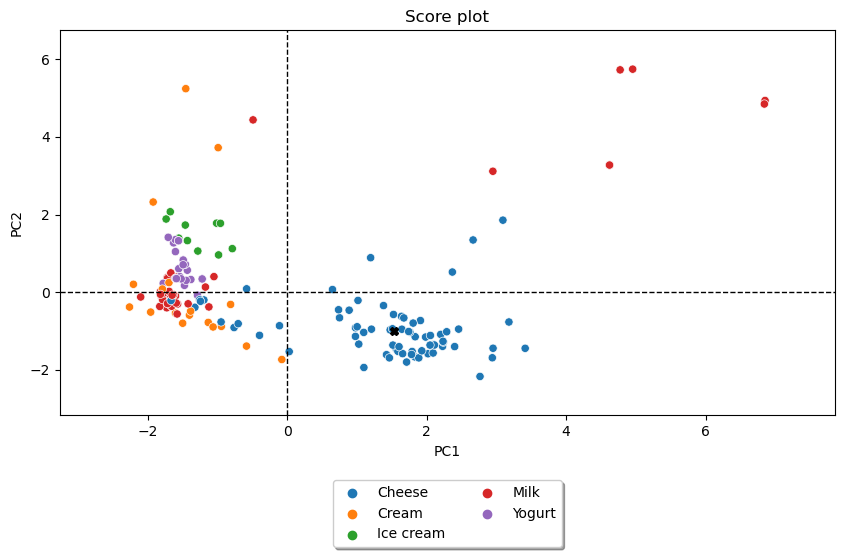

In [19]:
scaled = plot_score_plot(df_scale, pca, 2, categorise=df_label, width=10,margin=1)
x, y = calc_line(22.17, 22.35, 2.22, 1.01, 181, 0.034, 2.28, 505)
print(x,y)
plt.plot(x,y, color="black",marker="X")
plt.show()

-1.5477983295362345 1.3091890317936765


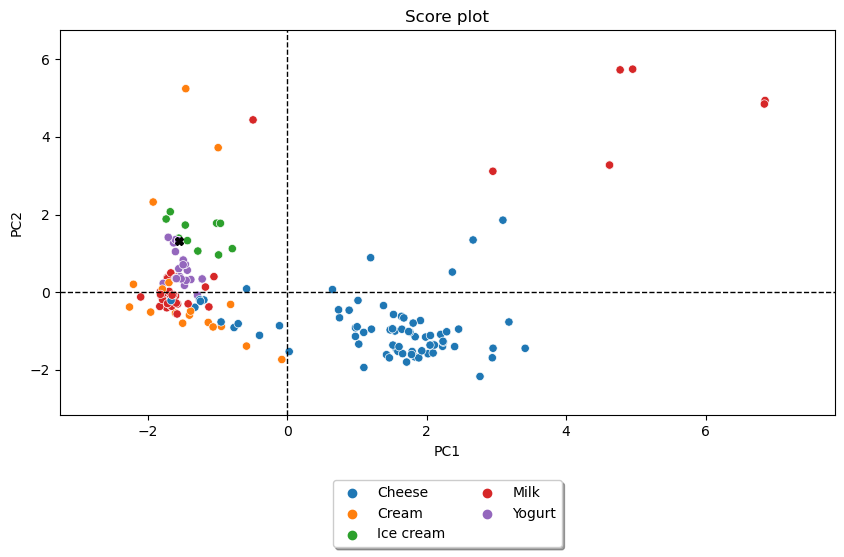

In [20]:
scaled = plot_score_plot(df_scale, pca, 2, categorise=df_label, width=10,margin=1)
x, y = calc_line(4.32, 1.42, 23.0, 14.58, 13, 0.047, 0.53, 114)
print(x,y)
plt.plot(x,y, color="black",marker="X")
plt.show()